In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

import plotly.express as px
import pygwalker as pyg #pip install pygwalker

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.sample(10)

gender    age  hypertension  heart_disease smoking_history    bmi  \
59048  Female 27.000             0              0         current 24.960   
40110  Female  5.000             0              0         No Info 14.790   
47065  Female 45.000             1              0         current 30.100   
56763  Female 16.000             0              0         No Info 28.060   
38299  Female 45.000             0              0         current 27.320   
97327    Male 41.000             0              0            ever 28.800   
50615  Female 80.000             0              0         No Info 27.320   
56370    Male 57.000             0              0         current 26.470   
22484  Female 58.000             0              0           never 27.320   
94108  Female 54.000             0              0         No Info 53.720   

       HbA1c_level  blood_glucose_level  diabetes  
59048        3.500                  200         0  
40110        6.500                  155         0  
47065        9.000                  145         1  
56763        4.000                  126         0  
38299        6.600                  126         0  
97327        4.800                  126         0  
50615        3.500                  130         0  
56370        4.500                  200         0  
22484        5.800                  130         0  
94108        4.800                  126         0

In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe().T

count    mean    std    min     25%     50%     75%  \
age                 100000.000  41.886 22.517  0.080  24.000  43.000  60.000   
hypertension        100000.000   0.075  0.263  0.000   0.000   0.000   0.000   
heart_disease       100000.000   0.039  0.195  0.000   0.000   0.000   0.000   
bmi                 100000.000  27.321  6.637 10.010  23.630  27.320  29.580   
HbA1c_level         100000.000   5.528  1.071  3.500   4.800   5.800   6.200   
blood_glucose_level 100000.000 138.058 40.708 80.000 100.000 140.000 159.000   
diabetes            100000.000   0.085  0.279  0.000   0.000   0.000   0.000   

                        max  
age                  80.000  
hypertension          1.000  
heart_disease         1.000  
bmi                  95.690  
HbA1c_level           9.000  
blood_glucose_level 300.000  
diabetes              1.000

In [7]:
df.heart_disease.value_counts(normalize = True)

0   0.961
1   0.039
Name: heart_disease, dtype: float64

In [8]:
df.diabetes.value_counts(normalize = True)

0   0.915
1   0.085
Name: diabetes, dtype: float64

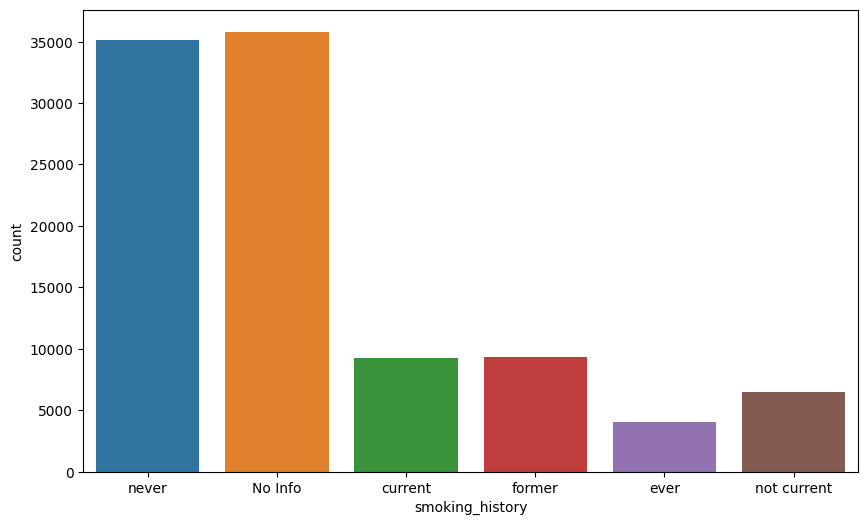

In [9]:
sns.countplot(x = df["smoking_history"])
plt.show()

In [10]:
df = df.drop(["smoking_history"], axis = 1);

In [11]:
df = df.drop(["gender"], axis = 1);

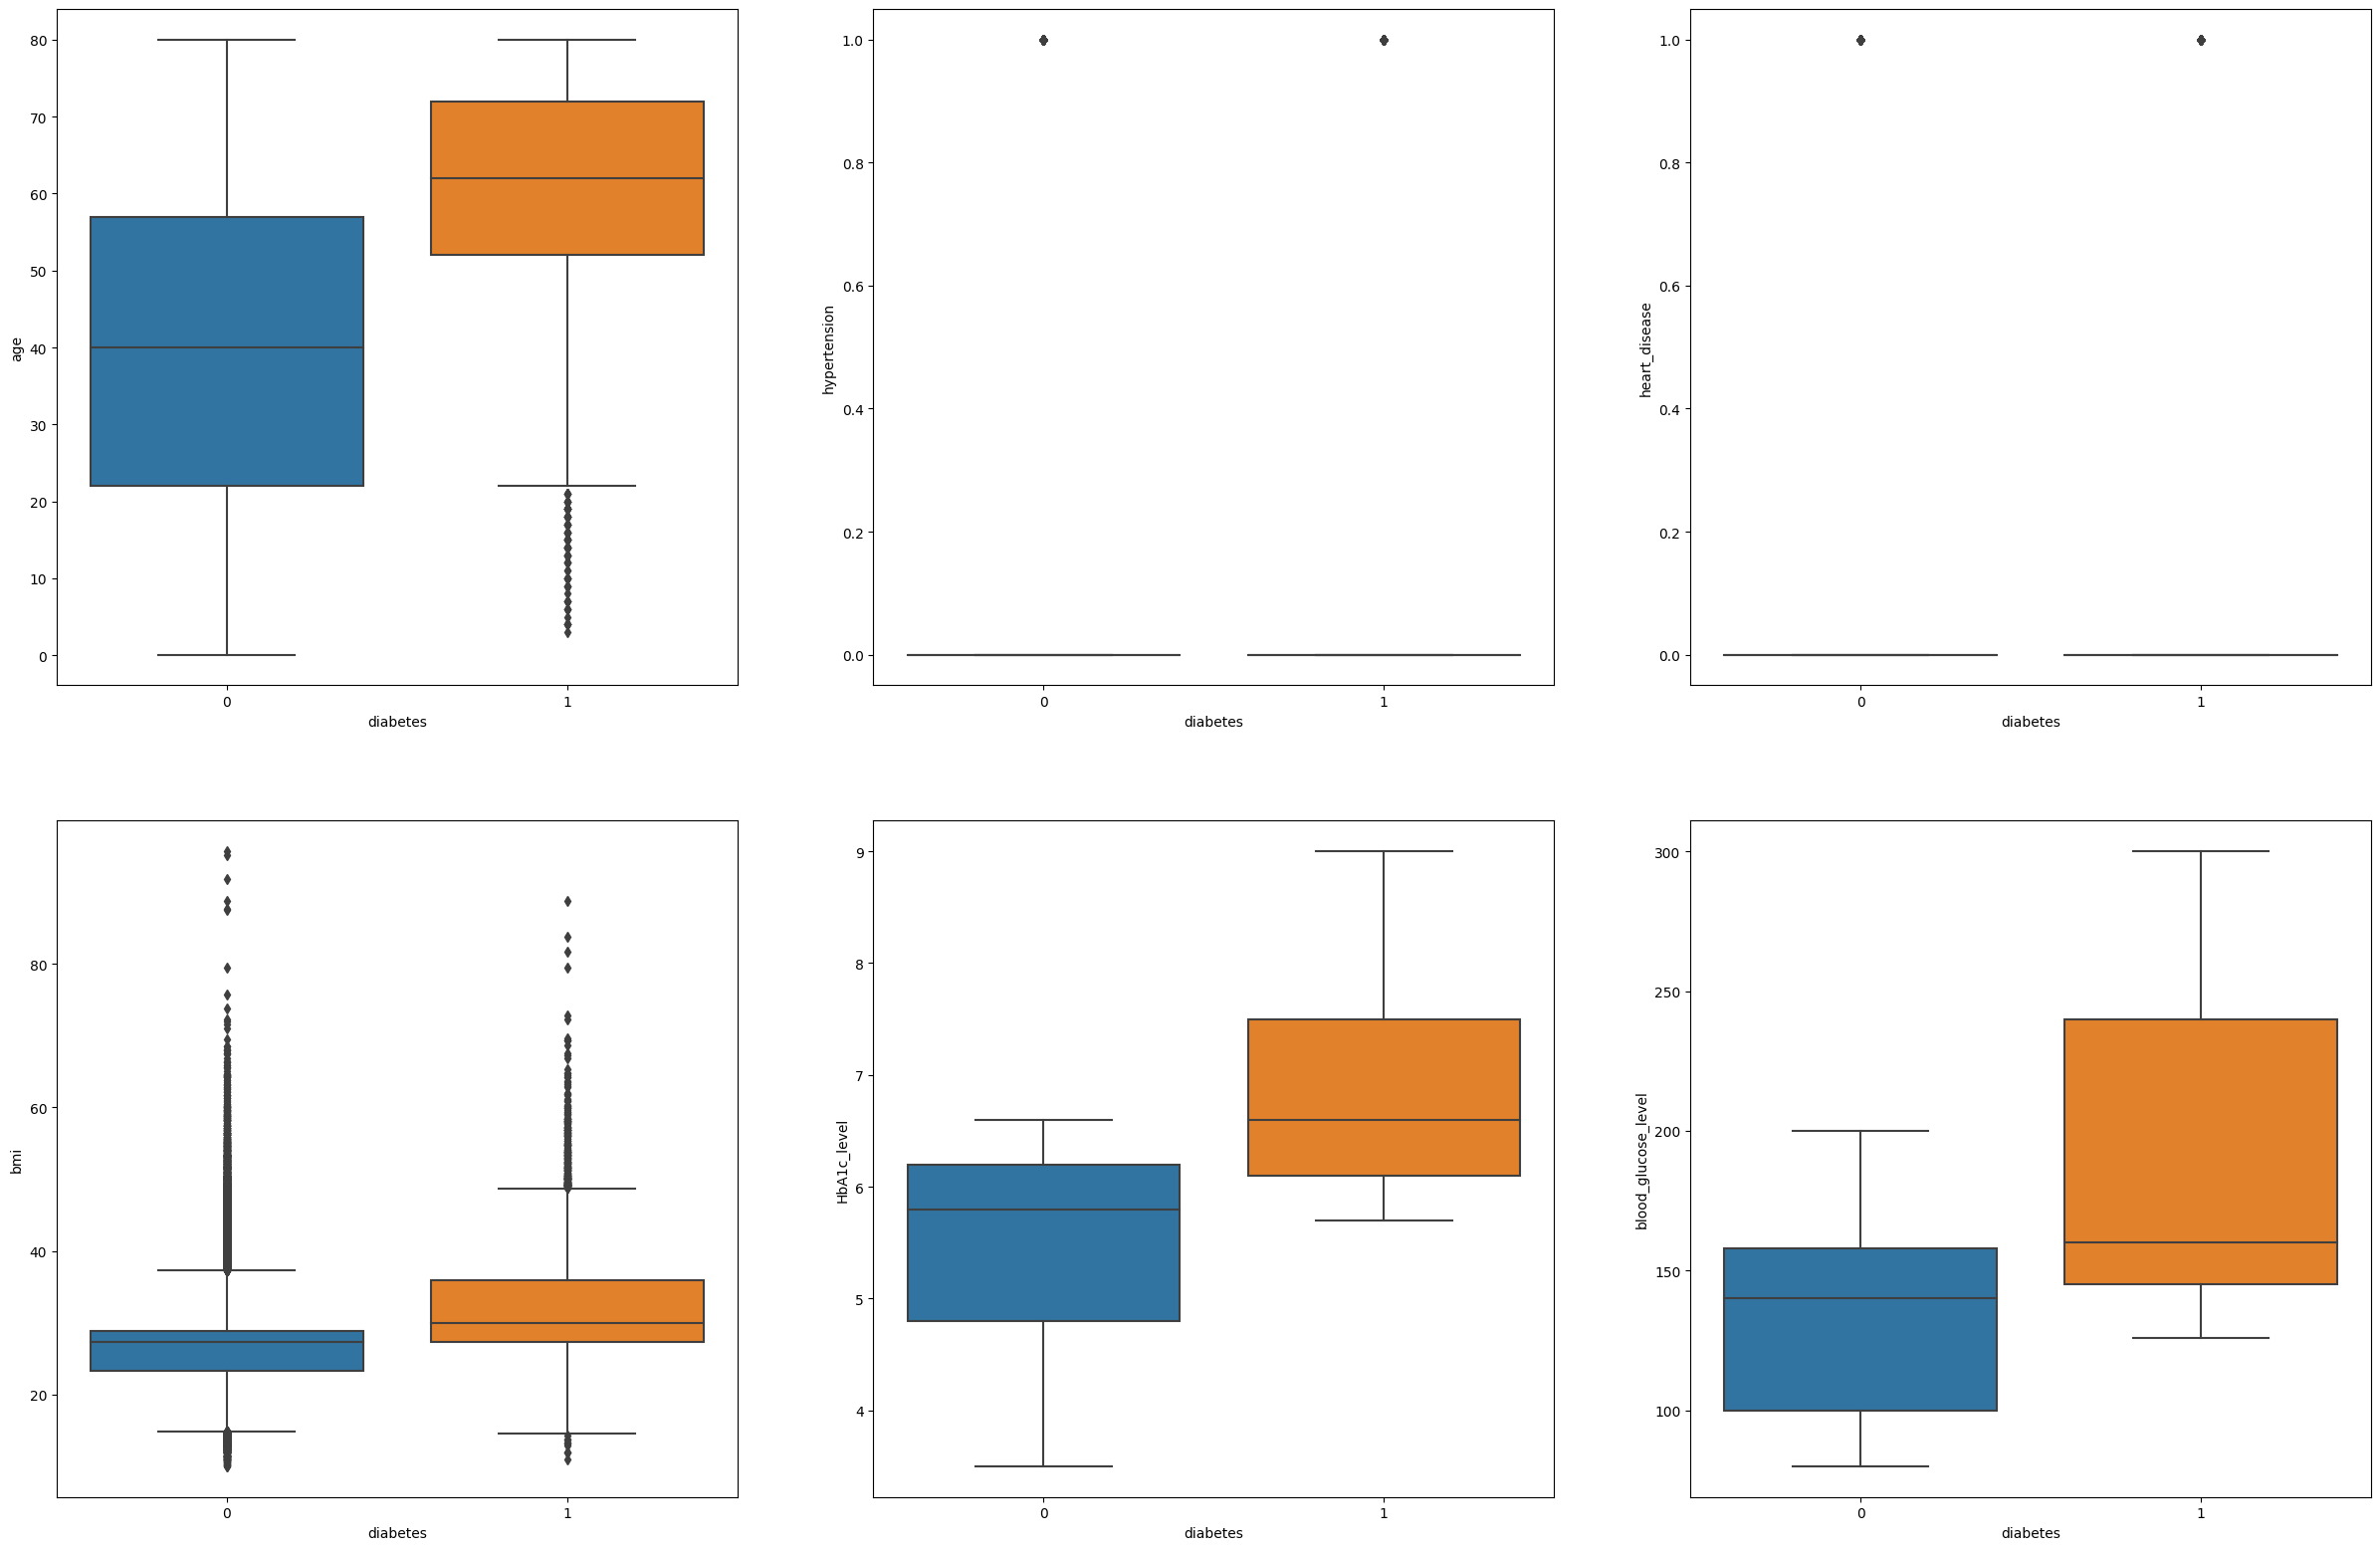

In [12]:
index = 0
plt.figure(figsize=(30,30))
for feature in df.columns:
    if feature != "diabetes":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='diabetes', y=feature, data=df)
plt.show()

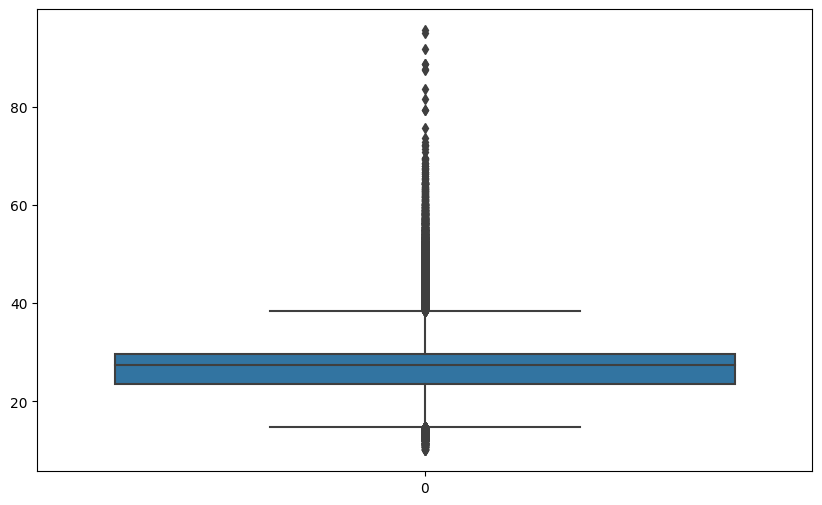

In [22]:
sns.boxplot(df.bmi)
plt.show()

In [23]:
df

age  hypertension  heart_disease    bmi  HbA1c_level  \
0     80.000             0              1 25.190        6.600   
1     54.000             0              0 27.320        6.600   
2     28.000             0              0 27.320        5.700   
3     36.000             0              0 23.450        5.000   
4     76.000             1              1 20.140        4.800   
...      ...           ...            ...    ...          ...   
99995 80.000             0              0 27.320        6.200   
99996  2.000             0              0 17.370        6.500   
99997 66.000             0              0 27.830        5.700   
99998 24.000             0              0 35.420        4.000   
99999 57.000             0              0 22.430        6.600   

       blood_glucose_level  diabetes  
0                      140         0  
1                       80         0  
2                      158         0  
3                      155         0  
4                      155         0  
...                    ...       ...  
99995                   90         0  
99996                  100         0  
99997                  155         0  
99998                  100         0  
99999                   90         0  

[100000 rows x 7 columns]

## Multicollinearity

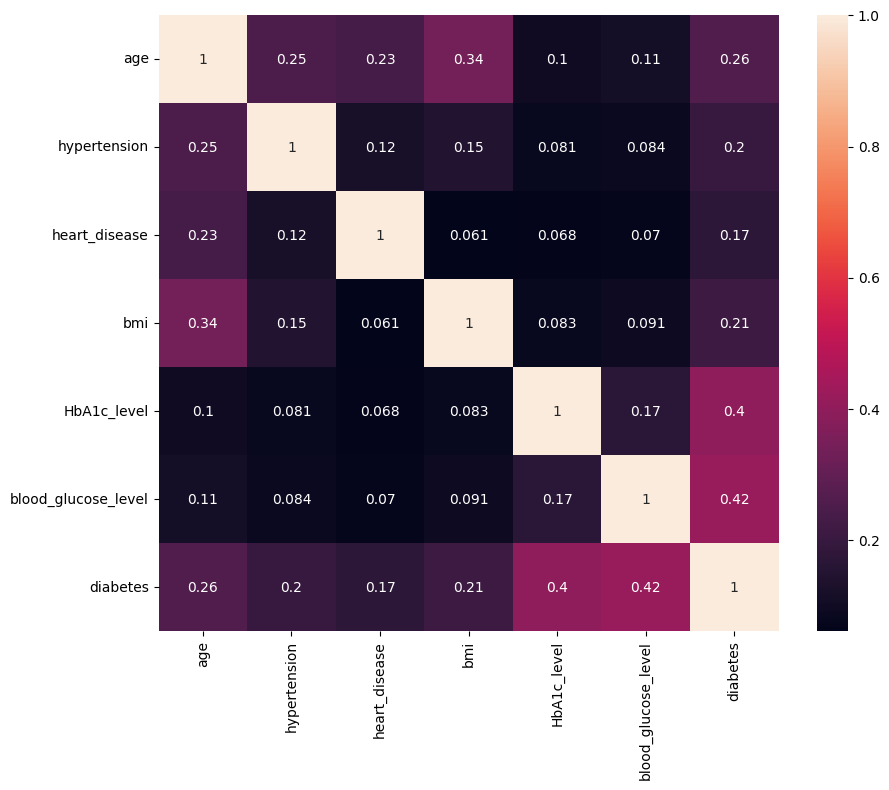

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

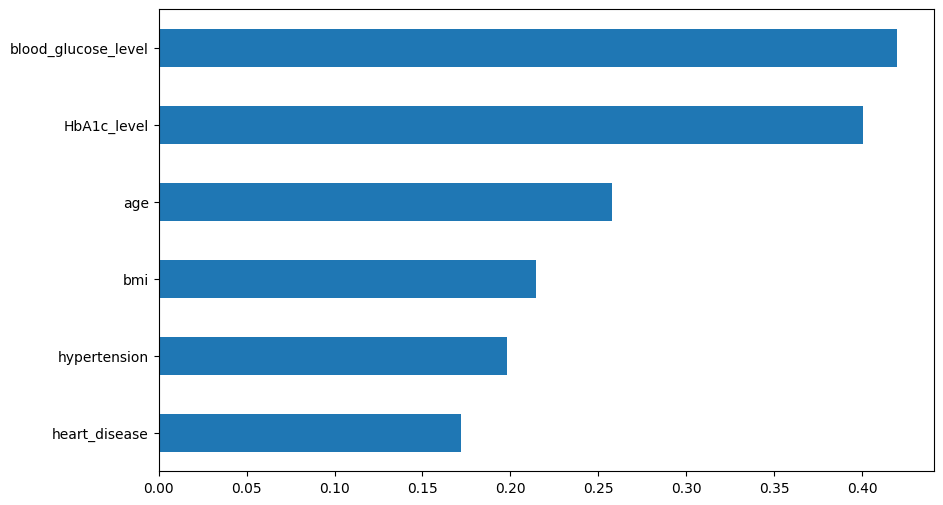

In [26]:
df.corr()["diabetes"].drop("diabetes").sort_values().plot.barh()
plt.show()

<Figure size 1200x600 with 0 Axes>

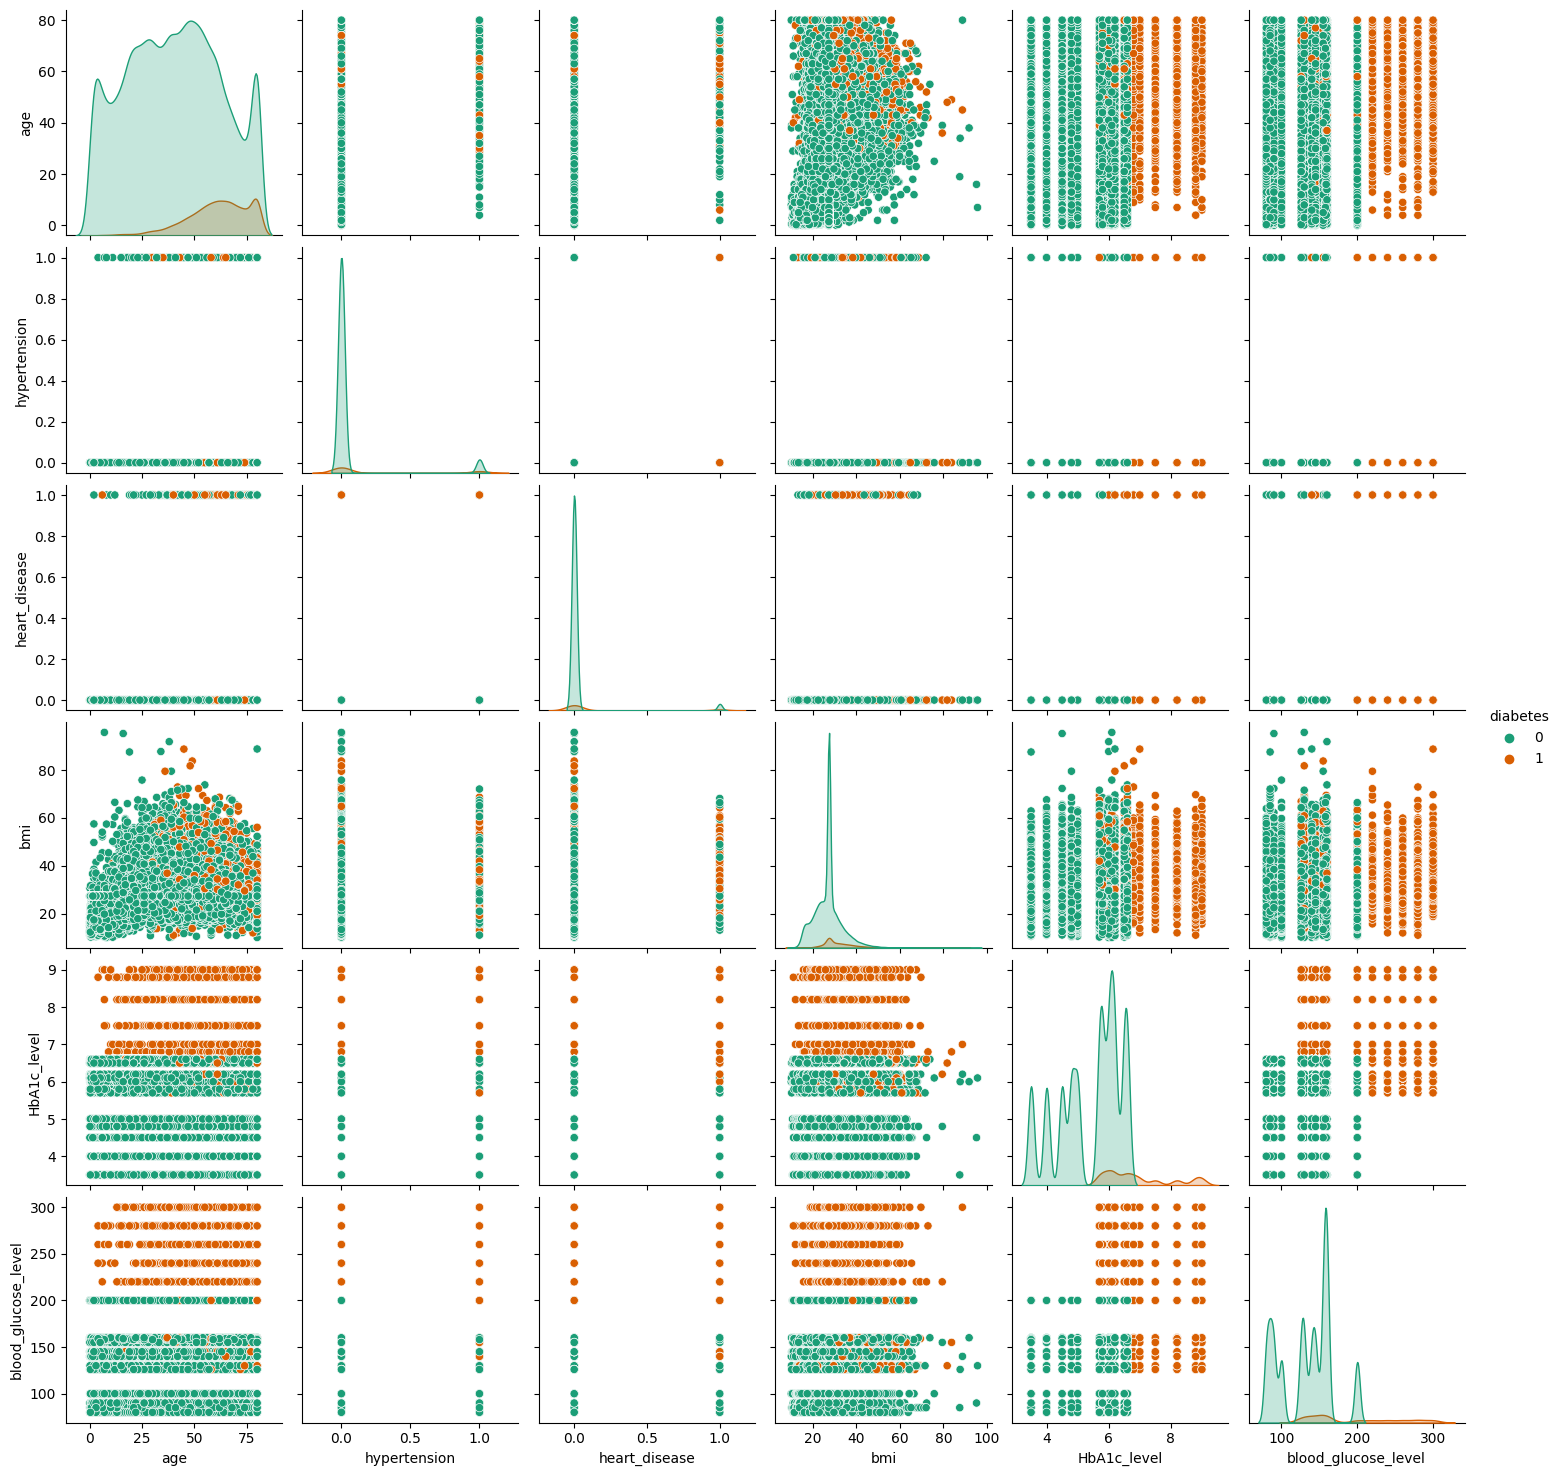

In [28]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue= "diabetes", palette="Dark2")
plt.show();

In [39]:
fig = px.scatter_3d(df,
                    x='blood_glucose_level',
                    y='bmi',
                    z='HbA1c_level',
                    color='diabetes')
fig.show();

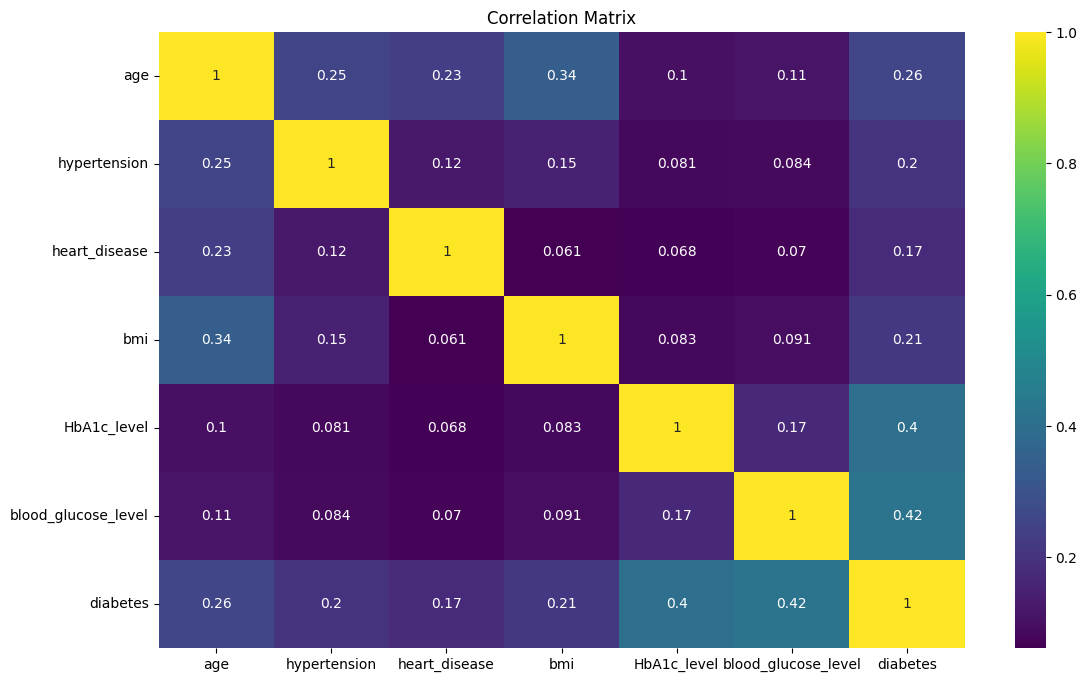

In [40]:
plt.figure(figsize=(13,8))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()